In [2]:
import pandas as pd
# Read the CSV file
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The data consists of age, gender, body mass index, number of children, smoking status, region of residence and insurance money.

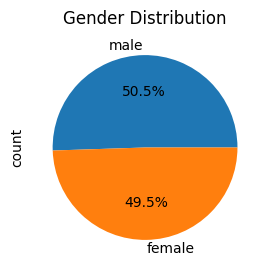

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3, 3))
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

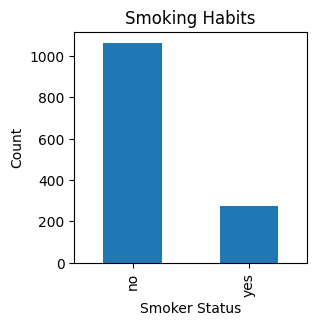

In [4]:
plt.figure(figsize=(3, 3))
df['smoker'].value_counts().plot(kind='bar')
plt.title('Smoking Habits')
plt.xlabel('Smoker Status')
plt.ylabel('Count')
plt.show()

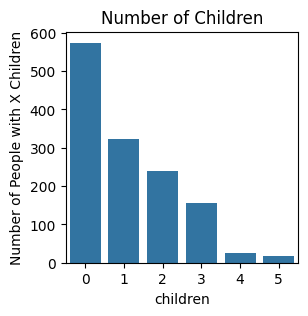

In [5]:
import seaborn as sns
plt.figure(figsize=(3, 3))
sns.countplot(data=df, x='children')
plt.title('Number of Children')
plt.ylabel('Number of People with X Children')
plt.xticks()
plt.show()

In [6]:
corr = df.corr(numeric_only=True)
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [7]:
df.shape

(1338, 7)

In [8]:
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [9]:
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [10]:
print(df.isnull())

        age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1338 rows x 7 columns]


IF THE DATA IS EMPTY, IT RETURNS TRUE, IF FULL, IT RETURNS FALSE.

In [11]:
print(df.isnull().sum().sort_values(ascending=False))

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [12]:
print(df["smoker"].describe())

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object


unique: information about how many categories are different from each other.

top: the name of the most common category in the column.

freq: frequency of the most common category in the column.

In [13]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [14]:
df["age_group"] = pd.cut(df.age, bins=[0, 40, 60, 100], labels=["young adult", "middle-aged", "old adults"])
df = df.drop("age", axis=1)

In [15]:
df.groupby("age_group")["charges"].agg(["mean", "count"])

/var/folders/5h/th9l74bn6gq4tgzt8lvgg4pm0000gn/T/ipykernel_29364/2314979125.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("age_group")["charges"].agg(["mean", "count"])


,mean,count
age_group,,
young adult,10219.422874,701
middle-aged,15888.757668,546
old adults,21063.163398,91


In [16]:
df.head()

,sex,bmi,children,smoker,region,charges,age_group
0,female,27.900,0,yes,southwest,16884.92400,young adult
1,male,33.770,1,no,southeast,1725.55230,young adult
2,male,33.000,3,no,southeast,4449.46200,young adult
3,male,22.705,0,no,northwest,21984.47061,young adult
4,male,28.880,0,no,northwest,3866.85520,young adult


In [17]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
# a region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)
# age
le.fit(df.age_group.drop_duplicates())
df.age_group = le.transform(df.age_group)

WE APPLIED LABEL ENCODING AND TRANSLATED THE DATA INTO A LANGUAGE THAT THE MACHINE CAN UNDERSTAND

In [18]:
df.tail()

,sex,bmi,children,smoker,region,charges,age_group
1333,1,30.97,3,0,1,10600.5483,0
1334,0,31.92,0,0,0,2205.9808,2
1335,0,36.85,0,0,2,1629.8335,2
1336,0,25.80,0,0,3,2007.9450,2
1337,0,29.07,0,1,1,29141.3603,1


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [20]:
X = df.drop(['charges','region'], axis = 1)
Y = df.charges



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)  # With PolynomialFeatures, X data is expanded with polynomial features and a new data set, x_quad, is created

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8654064219069727


x_quad = quad.fit_transform(X)

For example, suppose that initially X had two properties named "a" and "b". When degree=2 is used, the x_quad data set may contain:

feature "a"
feature "b"
"a^2" (a squared)
"ab" (multiplication of a and b)
"b^2" (b squared)
This expands your data to represent more complex relationships. In particular, it can be useful for models such as polynomial regression, because such models use polynomial terms to express complex relationships. This can help your data adapt better, providing greater flexibility.

In [21]:
# Separate your data and target variable
X = df.drop(['charges'], axis=1)
y = df['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

# Make predictions on training and test data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate performance metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mse_train, mse_test))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_train, r2_test))


MSE train data: 4364972.703, MSE test data: 26530799.410
R2 train data: 0.970, R2 test data: 0.829
